In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [23]:
import seaborn

In [51]:
import itertools

In [18]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [54]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [55]:
temp_df = df[['Ground Temperature']]
chirps_seconds = df['Chirps/Second']

In [56]:
regr1 = linear_model.LinearRegression()

In [69]:
regr1.fit(temp_df, chirps_seconds)
print('Coefficients: \n', regr1.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr1.predict(temp_df) - chirps_seconds) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance Score: %.2f' % regr1.score(temp_df, chirps_seconds))
print("Intercept: ", regr1.intercept_)

Coefficients: 
 [ 0.20299973]
Residual sum of squares: 0.84
Variance Score: 0.69
Intercept:  0.459314645236


Looking at the Variance Score, which is the equations R^2 score, this is an okay fit for the data.  69% is okay, but not great.  The equation for our regression lie is y = 0.203x + 0.459

/Users/ZSeaborn/Desktop/Homework/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


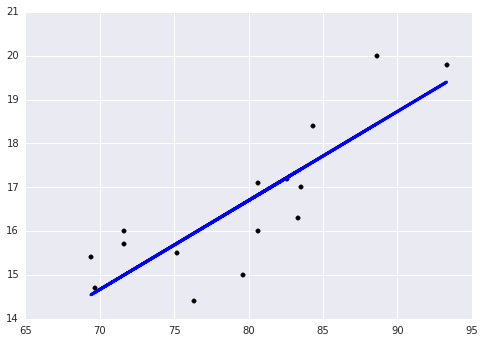

In [58]:
plt.scatter(temp_df, chirps_seconds,  color='black')
plt.plot(temp_df, regr1.predict(temp_df), color='blue', linewidth=3)
plt.show()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [22]:
regr.predict(95)

array([ 19.74428913])

If the temperature were 95 degrees, the number of chirps per second would be 19.74 according to our model.

In [28]:
regr.predict(86.5)

array([ 18.01879141])

To find the temperature at which the cricket chirps 18 times per second, I looked at the graph and determined it was somewhere around 86 degrees.  I then used our prediction to see if I was correct.  At 86 degrees, our model claims the cricket will chirp 17.917 times.  So then I tried 86.5 degrees, and our model predicts that the cricket will chirp 18.019 times.  Therefore, the cricket will chirp 18 times a second when the temperature is 86.5 degrees, according to our model.

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [36]:
df = pd.read_fwf("brain_body.txt")

In [37]:
regr2 = linear_model.LinearRegression()
brain = df['Brain']
body = df[['Body']]

In [70]:
regr2.fit(body, brain)
print('Coefficients: \n', regr2.coef_)
print('Variance Score: %.2f' % regr2.score(body, brain))
print("Intercept: ", regr2.intercept_)

Coefficients: 
 [ 0.90291295]
Variance Score: 0.87
Intercept:  -56.8555454286


/Users/ZSeaborn/Desktop/Homework/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


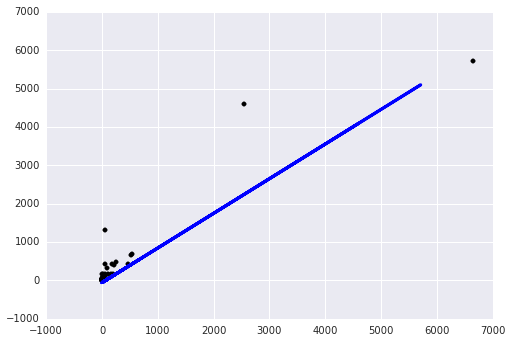

In [39]:
plt.scatter(brain, body,  color='black')
plt.plot(body, regr2.predict(body), color='blue', linewidth=3)
plt.show()

For this experiment, our model had an R^2 of .87, which is a great fit.  However, looking at the graph, all of our data is located very close to one another with a few major outliers.  While our fit was very good, I beleive that this might be a bit of an overfit model.  The equation of our regression line is y = 0.903x + -56.856

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [60]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [42]:
regr3 = linear_model.LinearRegression()
factors = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
salary_s = df['Salary']

In [43]:
regr3.fit(factors, salary)
print('Coefficients: \n', regr3.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr3.predict(factors) - salary_s) ** 2))
print('Variance Score: %.2f' % regr3.score(factors, salary_s))

Coefficients: 
 [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
Residual sum of squares: 4989120.86
Variance Score: 0.85


In [65]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df_4 = df
dependent_vars = list(df.columns)
dependent_vars.remove('Salary')
combos = list(itertools.combinations(dependent_vars, 1))
combos
choices = []

def regression_for(combo):
    combo = list(combo)
    df = df_4.loc[:, combo + ['Salary']]
    df.dropna(inplace=True)
    input_data = df[combo]
    salary = df['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))

In [66]:
choices

[(('Sex',), 0.063898925832880038),
 (('Rank',), 0.75253605392746314),
 (('Year',), 0.49093702676921624),
 (('Degree',), 0.0048616809847483733),
 (('YSdeg',), 0.45542813458360276)]

Using the linear model to predict salary using ALL factors, we received a variance of .85, which is very good.  Then we determined the effect of all indiviudal columns against the salary.  The "Rank" category returned the highest Variance, of .75, showing the strongest connection to salary.  Sex, it seems, is not a factor at all.  with a .06 variance, it is a very poor indicator of expected salary.  